# Python Project - Speed Dating Experiment

*URL of our dataset* : https://www.kaggle.com/annavictoria/speed-dating-experiment/data

*Description* : What influences love at first sight? (Or, at least, love in the first four minutes?) This dataset was compiled by Columbia Business School professors Ray Fisman and Sheena Iyengar for their paper Gender Differences in Mate Selection: Evidence From a Speed Dating Experiment.

Data was gathered from participants in experimental speed dating events from 2002-2004. During the events, the attendees would have a four minute "first date" with every other participant of the opposite sex. At the end of their four minutes, participants were asked if they would like to see their date again. They were also asked to rate their date on six attributes: Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests.

The dataset also includes questionnaire data gathered from participants at different points in the process. These fields include: demographics, dating habits, self-perception across key attributes, beliefs on what others find valuable in a mate, and lifestyle information. See the Speed Dating Data Key document below for details.

*We'll first try to uncover insights about the data - among which what are the least and most desirable attributes for each gender and the differences between what the individuals say they want, and what they actually like.*
*Then, we'll try to develop a predictive model to match people given their set of attributes* 

*But first, let's import and preprocess the data!*

## Importing data

In [1]:
# the usual import list
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import csv
from math import pi

In [7]:
import urllib.request as ur
ur.urlretrieve("http://www.kaggle.com/account/login?ReturnUrl=c/annavictoria/speed-dating-experiment/downloads/Speed%20Dating%20Data.csv", "Speed Dating Data.csv.zip")


('Speed Dating Data.csv.zip', <http.client.HTTPMessage at 0x108d297f0>)

*This way to download doesn't actually work : the resulting .zip file is not recognized as a .zip file by Python, and it is much lighter that what we actually get by manually downloading the file. This is because when we download the dataset this way, we don't actually log into Kaggle.*

*A research on the subject on the Internet shows this is not a simple matter, and we never saw how to deal with this kind of thing in class. Code such as the one found on this [page](https://ramhiser.com/2012/11/23/how-to-download-kaggle-data-with-python-and-requests-dot-py/) doesn't work, even after adapting it. We could just copy paste some complicated [code](http://blog.romanofoti.com/download_from_kaggle/) that we do not completely understand and input our credentials here, but this doesn't seem a sensible thing to do.*

*Consequently, we would like to invite you to download the dataset directly using this [link](https://www.kaggle.com/annavictoria/speed-dating-experiment/downloads/Speed%20Dating%20Data.csv).*

*Now that it's done, let's actually import and preprocess the data*

In [8]:
sdd = pd.read_csv("Speed Dating Data.csv", encoding="latin_1", dtype={'field' : str, 'from' : str, 'career' : str})

In [9]:
sdd.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


*The NaN values are just missing data, such as a speed dating session where the initial position of the participants was not recorded, or people that did not meet as many dates as the others.*

*To finish the preprocessing, we would like to remove the rows corresponding to waves 6 to 9, because the participants were not rated in the same way for these waves as for the others (a grade between 1 and 10 for each attribute rather than 100 points to distribute).*

*The affected ratings series are 1_2, 2_1, 4_1 and 1_1. In the dataset, these ratings were "scaled" so that their sum is equal to 100 (which is why some grades such as 16.67 appear), but have the different instructions caused different grading patterns ? Let's find out ! *

In [10]:
#Here is what we mean when we say that the grades 1-10 have been scaled. Indeed, 16.67*6 = 100
sdd[['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']].loc[sdd['wave'].isin([6,7,8,9])].head()

,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1
1846,16.67,16.67,16.67,16.67,16.67,16.67
1847,16.67,16.67,16.67,16.67,16.67,16.67
1848,16.67,16.67,16.67,16.67,16.67,16.67
1849,16.67,16.67,16.67,16.67,16.67,16.67
1850,16.67,16.67,16.67,16.67,16.67,16.67


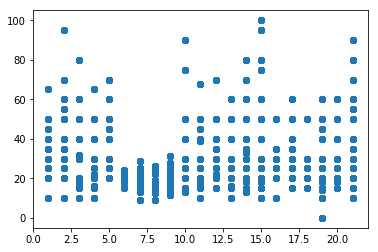

In [11]:
mpl.scatter(sdd['wave'], sdd['attr2_1'])
mpl.show()

*What we see above is that despite the "scaling" of the grades from 1-10 to a total sum of 100, the distribution is still different in waves 6-9. This is probably because when respondents were allocating 100 points, they probably gave a very high grade to a category (for instance, 75 for the importance of attractiveness) while "sacrificing" the other, less important criteria (for instance, by giving them each 5 points). On the other hand, participants from waves 6-9 didn't have to do theses "sacrifices". *

*A respondent giving attractiveness 9 points and 1 to all others was still allocating comparatively more points to the other criteria than the previous example (because 5 is 1/15 of 75, whereas 1 is 1/9 of 9). Since people probably did not think in mathematical terms when giving grades, we cannot consider that the data in these waves is matching. *

*Therefore we remove these waves. Luckily, this still leaves us with enough data to proceed.*

In [12]:
sddOK = sdd.query('wave not in [6,7,8,9]')
sddOK.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


*To continue preprocessing, we would like to get rid of all the variables that we won't use for the analysis.*

In [13]:
sddOK = sddOK.drop({'id', 'idg', 'condtn', 'position', 'positin1', 'mn_sat'} , axis=1)
sddOK.head()

,iid,gender,wave,round,order,partner,pid,match,int_corr,samerace,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,0,1,10,4,1,11.0,0,0.14,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,0,1,10,3,2,12.0,0,0.54,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,0,1,10,10,3,13.0,1,0.16,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,0,1,10,5,4,14.0,1,0.61,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,0,1,10,7,5,15.0,1,0.21,0,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


## Unsupervised Learning

### Attributes and Choice

*We would now like to visualize the difference between how people actually took their decision vs. how they thought they would take these decisions. Could it be that - at least when we only have 4 minutes to take a decision - we choose our partners differently from how we think we do it ?*

In [14]:
#First we compute what people thought mattered to them prior to the dates (average values)

Attractive_prior = np.mean(sddOK['attr1_1'])
Sincere_prior = np.mean(sddOK['sinc1_1'])
Intelligent_prior = np.mean(sddOK['intel1_1']) 
Fun_prior = np.mean(sddOK['fun1_1'])
Ambitious_prior = np.mean(sddOK['amb1_1'])
Interest_prior = np.mean(sddOK['shar1_1'])

#Then we compute what actually mattered in people's decisions after the dates (average values)

Attractive_posterior = np.mean(sddOK['attr7_2'])
Sincere_posterior = np.mean(sddOK['sinc7_2'])
Intelligent_posterior = np.mean(sddOK['intel7_2']) 
Fun_posterior = np.mean(sddOK['fun7_2'])
Ambitious_posterior = np.mean(sddOK['amb7_2'])
Interest_posterior = np.mean(sddOK['shar7_2'])

In [15]:
#We turn this into a dictionary so that we can plot the values
prior_radar_data = {'Attractive' : Attractive_prior, 'Sincere' : Sincere_prior, 'Intelligent' : Intelligent_prior, 'Fun' : Fun_prior, 'Ambitious' : Ambitious_prior, 'Interest' : Interest_prior}
prior_radar_data

{'Ambitious': 9.744157988693843,
 'Attractive': 23.982564520913655,
 'Fun': 17.352205882352926,
 'Intelligent': 20.55999851676056,
 'Interest': 11.25451492537312,
 'Sincere': 17.298111836250367}

In [16]:
#Same thing here for posterior values
posterior_radar_data = {'Attractive' : Attractive_posterior, 'Sincere' : Sincere_posterior, 'Intelligent' : Intelligent_posterior, 'Fun' : Fun_posterior, 'Ambitious' : Ambitious_posterior, 'Interest' : Interest_posterior}
posterior_radar_data

{'Ambitious': 7.28695652173913,
 'Attractive': 32.819556451612904,
 'Fun': 18.86844758064516,
 'Intelligent': 15.293850806451612,
 'Interest': 12.156028368794326,
 'Sincere': 13.529923273657289}

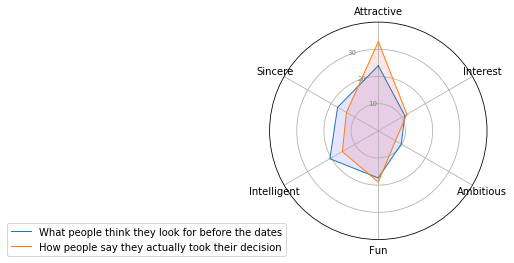

In [17]:
# number of variable
attributes=list(prior_radar_data)
N = len(attributes)

# We set at what angles each attribute will appear, since the graph is circular
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1] #so that all 6 attributes appear on the graph
angles

### Initialise the spider plot
graph = mpl.subplot(polar=True)
 
graph.set_theta_offset(np.pi / 2) #We set the offset, or "beginning" of the plot to be on top of the circle

# We reduce the number of axes to the number of attributes we want to see on our graph and add labels
# We remove the last element of the angles so that each attribute is on one concentric axis
mpl.xticks(angles[:-1], attributes) 

# Draw ylabels
#ax.set_rlabel_position(0)
mpl.yticks([10,20,30], ["10","20","30"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,40) #set the limit of the scale of the graph

### Now we add the plotted data

# Plot prior values
values_prior = list(prior_radar_data.values())
values_prior += values_prior[:1] #again we repeat the first item
graph.plot(angles, values_prior, linewidth=1, linestyle='solid', label="What people think they look for before the dates")
graph.fill(angles, values_prior, 'b', alpha=0.1)

# Plot posterior values
values_posterior = list(posterior_radar_data.values())
values_posterior += values_posterior[:1] #again we repeat the first item
graph.plot(angles, values_posterior, linewidth=1, linestyle='solid', label="How people say they actually took their decision")
graph.fill(angles, values_posterior, 'r', alpha=0.1)

# We add legend
mpl.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

mpl.show()

*The graph shows that, before the dates, people underestimate how much their partner's looks matter to them. This may be due to the fact that, in "real life", they are used to choosing their partner on criteria that take more than 4 minutes to evaluate. One explanation is that because of the time constraint linked to speed dating, people rely more heavily on criteria that can be evaluated in an instant. Another explanation is that people think of themselves as less shallow than they actually are...*

*This graph was quite useful ; let's turn the code above into a function that we can use again all throughout the analysis.*

In [18]:
def spider_plot(dic, legend):
    
    # number of variable
    attributes=list(dic)
    N = len(attributes)

    # We set at what angles each attribute will appear, since the graph is circular
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1] #so that all attributes appear on the graph
    angles

    ### Initialise the spider plot
    graph = mpl.subplot(polar=True)
 
    graph.set_theta_offset(np.pi / 2) #We set the offset, or "beginning" of the plot to be on top of the circle

    # We reduce the number of axes to the number of attributes we want to see on our graph and add labels
    # We remove the last element of the angles so that each attribute is on one concentric axis
    mpl.xticks(angles[:-1], attributes) 

    # Draw ylabels
    #ax.set_rlabel_position(0)
    mpl.yticks([10,20,30], ["10","20","30"], color="grey", size=7) #set the scale of the graph
    mpl.ylim(0,40) #set the limit of the scale of the graph

    ### Now we add the plotted data

    # Plot prior values
    data = list(dic.values())
    data += data[:1] #again we repeat the first item
    graph.plot(angles, data, linewidth=1, linestyle='solid', label=legend)
    graph.fill(angles, data, 'b', alpha=0.1)

    # We add legend
    mpl.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

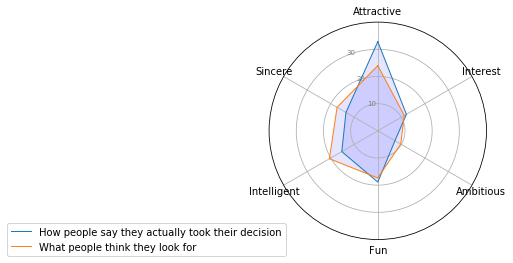

In [19]:
spider_plot(posterior_radar_data, "How people say they actually took their decision")
spider_plot(prior_radar_data, "What people think they look for")
mpl.show()

*Now that we have this useful function, let's look into this more deeply, and see whether this is the same for each gender.*

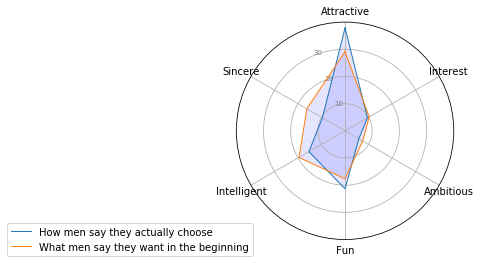

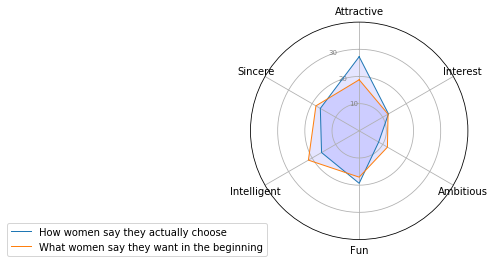

In [20]:
#We do the same steps as before for males only
sddOKM = sddOK.query('gender == 1')
MAttractive_prior = np.mean(sddOKM['attr1_1'])
MSincere_prior = np.mean(sddOKM['sinc1_1'])
MIntelligent_prior = np.mean(sddOKM['intel1_1']) 
MFun_prior = np.mean(sddOKM['fun1_1'])
MAmbitious_prior = np.mean(sddOKM['amb1_1'])
MInterest_prior = np.mean(sddOKM['shar1_1'])

sddOKMMatch = sddOKM.query('match == 1')
MAttractive_posterior = np.mean(sddOKMMatch['attr7_2'])
MSincere_posterior = np.mean(sddOKMMatch['sinc7_2'])
MIntelligent_posterior = np.mean(sddOKMMatch['intel7_2']) 
MFun_posterior = np.mean(sddOKMMatch['fun7_2'])
MAmbitious_posterior = np.mean(sddOKMMatch['amb7_2'])
MInterest_posterior = np.mean(sddOKMMatch['shar7_2'])

Mprior_radar_data = {'Attractive' : MAttractive_prior, 'Sincere' : MSincere_prior, 'Intelligent' : MIntelligent_prior, 'Fun' : MFun_prior, 'Ambitious' : MAmbitious_prior, 'Interest' : MInterest_prior}
Mposterior_radar_data = {'Attractive' : MAttractive_posterior, 'Sincere' : MSincere_posterior, 'Intelligent' : MIntelligent_posterior, 'Fun' : MFun_posterior, 'Ambitious' : MAmbitious_posterior, 'Interest' : MInterest_posterior}

#And now the same for females. 
sddOKF = sddOK.query('gender == 0')
FAttractive_prior = np.mean(sddOKF['attr1_1'])
FSincere_prior = np.mean(sddOKF['sinc1_1'])
FIntelligent_prior = np.mean(sddOKF['intel1_1']) 
FFun_prior = np.mean(sddOKF['fun1_1'])
FAmbitious_prior = np.mean(sddOKF['amb1_1'])
FInterest_prior = np.mean(sddOKF['shar1_1'])

sddOKFMatch = sddOKF.query('match == 1')
FAttractive_posterior = np.mean(sddOKFMatch['attr7_2'])
FSincere_posterior = np.mean(sddOKFMatch['sinc7_2'])
FIntelligent_posterior = np.mean(sddOKFMatch['intel7_2']) 
FFun_posterior = np.mean(sddOKFMatch['fun7_2'])
FAmbitious_posterior = np.mean(sddOKFMatch['amb7_2'])
FInterest_posterior = np.mean(sddOKFMatch['shar7_2'])

Fprior_radar_data = {'Attractive' : FAttractive_prior, 'Sincere' : FSincere_prior, 'Intelligent' : FIntelligent_prior, 'Fun' : FFun_prior, 'Ambitious' : FAmbitious_prior, 'Interest' : FInterest_prior}
Fposterior_radar_data = {'Attractive' : FAttractive_posterior, 'Sincere' : FSincere_posterior, 'Intelligent' : FIntelligent_posterior, 'Fun' : FFun_posterior, 'Ambitious' : FAmbitious_posterior, 'Interest' : FInterest_posterior}

#And now we plot everything. 

spider_plot(Mposterior_radar_data, "How men say they actually choose")
spider_plot(Mprior_radar_data, "What men say they want in the beginning")
mpl.show()
spider_plot(Fposterior_radar_data, "How women say they actually choose")
spider_plot(Fprior_radar_data, "What women say they want in the beginning")
mpl.show()

*Splitting the graph we had before into these two graphs lets us know that on average men are more aware than women of what they actually want (especially for ambition, fun, and shared interests), whereas women are less consistent (especially when it comes to ambition and intelligence, which are important according to what they say in the beginning, but not taken into account when they choose). Men are also more likely than women to admit directly how much attractiveness matters to them. *

*This is quite interesting, but we can go further. Instead of looking at the difference between what people said they wanted in the beginning, and how they said they made their choices, let's look directly at how they **actually** made their choice?*

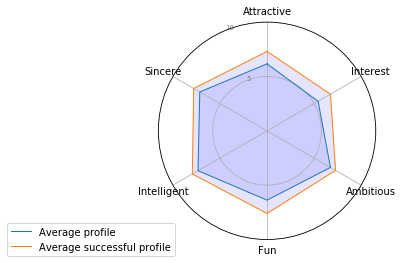

In [21]:
#Let's compute what actually mattered in people's decisions during the dates, when a match occured (average values)
sddmatch = sddOK.query('match == 1')

Attractive_match = np.mean(sddmatch['attr'])
Sincere_match = np.mean(sddmatch['sinc'])
Intelligent_match = np.mean(sddmatch['intel']) 
Fun_match = np.mean(sddmatch['fun'])
Ambitious_match = np.mean(sddmatch['amb'])
Interest_match= np.mean(sddmatch['shar'])

Attractive_average = np.mean(sddOK['attr'])
Sincere_average = np.mean(sddOK['sinc'])
Intelligent_average = np.mean(sddOK['intel']) 
Fun_average = np.mean(sddOK['fun'])
Ambitious_average = np.mean(sddOK['amb'])
Interest_average= np.mean(sddOK['shar'])

#And compare it to the average profile
match_radar_data = {'Attractive' : Attractive_match, 'Sincere' : Sincere_match, 'Intelligent' : Intelligent_match, 'Fun' : Fun_match, 'Ambitious' : Ambitious_match, 'Interest' : Interest_match}

average_radar_data = {'Attractive' : Attractive_average, 'Sincere' : Sincere_average, 'Intelligent' : Intelligent_average, 'Fun' : Fun_average, 'Ambitious' : Ambitious_average, 'Interest' : Interest_average}

spider_plot(average_radar_data, "Average profile")
spider_plot(match_radar_data, "Average successful profile")
mpl.yticks([5, 10], ["5","10"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,10) #set the limit of the scale of the graph
mpl.show()

*It looks like successful profiles are rated slightly above average for all attributes, especially when it comes to attractiveness, shared interest, and fun. We'll try to confirm that later, with a regression. For now, let's see whether it is different for each gender.*

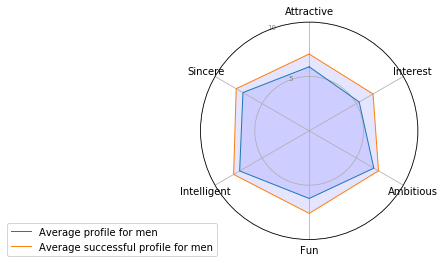

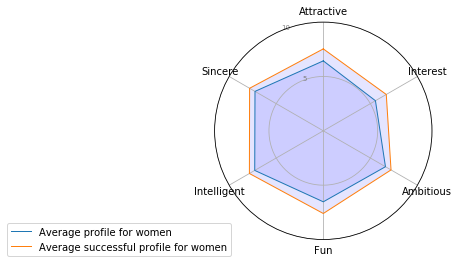

In [57]:
#for males - so we only take the data of females
sddmatch = sddOK.query('match == 1 & gender == 0')

Attractive_match = np.mean(sddmatch['attr'])
Sincere_match = np.mean(sddmatch['sinc'])
Intelligent_match = np.mean(sddmatch['intel']) 
Fun_match = np.mean(sddmatch['fun'])
Ambitious_match = np.mean(sddmatch['amb'])
Interest_match= np.mean(sddmatch['shar'])

Attractive_average = np.mean(sddOKF['attr'])
Sincere_average = np.mean(sddOKF['sinc'])
Intelligent_average = np.mean(sddOKF['intel']) 
Fun_average = np.mean(sddOKF['fun'])
Ambitious_average = np.mean(sddOKF['amb'])
Interest_average= np.mean(sddOKF['shar'])

#And compare it to the average profile
match_radar_data = {'Attractive' : Attractive_match, 'Sincere' : Sincere_match, 'Intelligent' : Intelligent_match, 'Fun' : Fun_match, 'Ambitious' : Ambitious_match, 'Interest' : Interest_match}

average_radar_data = {'Attractive' : Attractive_average, 'Sincere' : Sincere_average, 'Intelligent' : Intelligent_average, 'Fun' : Fun_average, 'Ambitious' : Ambitious_average, 'Interest' : Interest_average}

spider_plot(average_radar_data, "Average profile for men")
spider_plot(match_radar_data, "Average successful profile for men")
mpl.yticks([5, 10], ["5","10"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,10) #set the limit of the scale of the graph
mpl.show()

#for females - so we only take data from males
sddmatch = sddOK.query('match == 1 & gender == 1')

Attractive_match = np.mean(sddmatch['attr'])
Sincere_match = np.mean(sddmatch['sinc'])
Intelligent_match = np.mean(sddmatch['intel']) 
Fun_match = np.mean(sddmatch['fun'])
Ambitious_match = np.mean(sddmatch['amb'])
Interest_match= np.mean(sddmatch['shar'])

Attractive_average = np.mean(sddOKM['attr'])
Sincere_average = np.mean(sddOKM['sinc'])
Intelligent_average = np.mean(sddOKM['intel']) 
Fun_average = np.mean(sddOKM['fun'])
Ambitious_average = np.mean(sddOKM['amb'])
Interest_average= np.mean(sddOKM['shar'])

#And compare it to the average profile
match_radar_data = {'Attractive' : Attractive_match, 'Sincere' : Sincere_match, 'Intelligent' : Intelligent_match, 'Fun' : Fun_match, 'Ambitious' : Ambitious_match, 'Interest' : Interest_match}

average_radar_data = {'Attractive' : Attractive_average, 'Sincere' : Sincere_average, 'Intelligent' : Intelligent_average, 'Fun' : Fun_average, 'Ambitious' : Ambitious_average, 'Interest' : Interest_average}

spider_plot(average_radar_data, "Average profile for women")
spider_plot(match_radar_data, "Average successful profile for women")
mpl.yticks([5, 10], ["5","10"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,10) #set the limit of the scale of the graph
mpl.show()

*The difference between an average profile and a successful profile seems to be quite similar for both genders, successful men being slightly more attractive, fun, and with shared interest compared to their peers than successful women are compared to their peers.*

*We would have loved to compare the difference between what people think they want in the beginning, with the people they actually match. Unfortunately, because the former is related to the distribution of 100 points, with attributes being dependent, and the latter is related to grades on a scale of 10, there is no relevant way to compare them.*

### Attributes and Self-Assessment

*Now, let's look at all the self assessment data. People were asked to rate themselves according to the different attributes, then to express how they thought people rated them, and lastly they were actually rated by other people. 
Let's see how self-perception differs from actual perception by others, using the same method as before.*

*For this part, we'll put aside Shared Interest, which can't be compared from one person to another because it depends largely on who is the observer, rather than the actual subject*

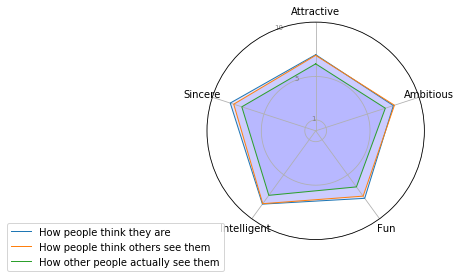

In [23]:
Attractive_self = np.mean(sddOK['attr3_1'])
Sincere_self = np.mean(sddOK['sinc3_1'])
Intelligent_self = np.mean(sddOK['intel3_1']) 
Fun_self = np.mean(sddOK['fun3_1'])
Ambitious_self = np.mean(sddOK['amb3_1'])

Attractive_perceived = np.mean(sddOK['attr5_1'])
Sincere_perceived = np.mean(sddOK['sinc5_1'])
Intelligent_perceived = np.mean(sddOK['intel5_1']) 
Fun_perceived = np.mean(sddOK['fun5_1'])
Ambitious_perceived = np.mean(sddOK['amb5_1'])

Attractive_observed = np.mean(sddOK['attr_o'])
Sincere_observed = np.mean(sddOK['sinc_o'])
Intelligent_observed = np.mean(sddOK['intel_o']) 
Fun_observed = np.mean(sddOK['fun_o'])
Ambitious_observed = np.mean(sddOK['amb_o'])

Self_radar_data = {'Attractive' : Attractive_self, 'Sincere' : Sincere_self, 'Intelligent' : Intelligent_self, 'Fun' : Fun_self, 'Ambitious' : Ambitious_self}
Perceived_radar_data = {'Attractive' : Attractive_perceived, 'Sincere' : Sincere_perceived, 'Intelligent' : Intelligent_perceived, 'Fun' : Fun_perceived, 'Ambitious' : Ambitious_perceived}
Observed_radar_data = {'Attractive' : Attractive_observed, 'Sincere' : Sincere_observed, 'Intelligent' : Intelligent_observed, 'Fun' : Fun_observed, 'Ambitious' : Ambitious_observed}

spider_plot(Self_radar_data, "How people think they are")
spider_plot(Perceived_radar_data, "How people think others see them")
spider_plot(Observed_radar_data, "How other people actually see them")
mpl.yticks([1,5,10], ["1","5","10"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,10) #set the limit of the scale of the graph
mpl.show()

*This graph is very interesting. It shows that on average, people think others see them as they think they are.
But actually, everyone significantly overestimates his attributes : everyone thinks he is better than he actually is. 
It might also be linked to the very short amount of time given for the speed dating sessions, that doesn't enable people to get to know each other sufficiently*

*Let's see whether one gender is more realistic than the other.*

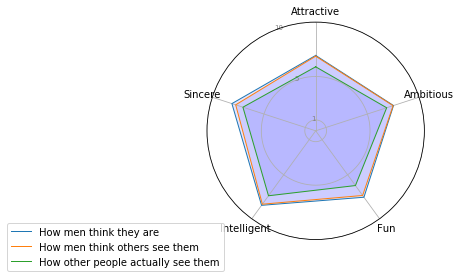

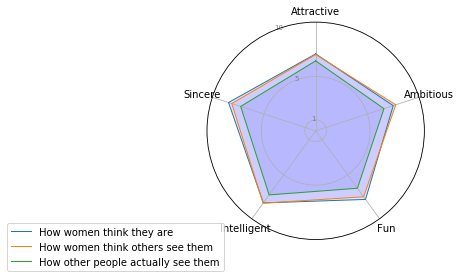

In [24]:
MAttractive_self = np.mean(sddOKM['attr3_1'])
MSincere_self = np.mean(sddOKM['sinc3_1'])
MIntelligent_self = np.mean(sddOKM['intel3_1']) 
MFun_self = np.mean(sddOKM['fun3_1'])
MAmbitious_self = np.mean(sddOKM['amb3_1'])

MAttractive_perceived = np.mean(sddOKM['attr5_1'])
MSincere_perceived = np.mean(sddOKM['sinc5_1'])
MIntelligent_perceived = np.mean(sddOKM['intel5_1']) 
MFun_perceived = np.mean(sddOKM['fun5_1'])
MAmbitious_perceived = np.mean(sddOKM['amb5_1'])

MAttractive_observed = np.mean(sddOKM['attr_o'])
MSincere_observed = np.mean(sddOKM['sinc_o'])
MIntelligent_observed = np.mean(sddOKM['intel_o']) 
MFun_observed = np.mean(sddOKM['fun_o'])
MAmbitious_observed = np.mean(sddOKM['amb_o'])

MSelf_radar_data = {'Attractive' : MAttractive_self, 'Sincere' : MSincere_self, 'Intelligent' : MIntelligent_self, 'Fun' : MFun_self, 'Ambitious' : MAmbitious_self}
MPerceived_radar_data = {'Attractive' : MAttractive_perceived, 'Sincere' : MSincere_perceived, 'Intelligent' : MIntelligent_perceived, 'Fun' : MFun_perceived, 'Ambitious' : MAmbitious_perceived}
MObserved_radar_data = {'Attractive' : MAttractive_observed, 'Sincere' : MSincere_observed, 'Intelligent' : MIntelligent_observed, 'Fun' : MFun_observed, 'Ambitious' : MAmbitious_observed}

spider_plot(MSelf_radar_data, "How men think they are")
spider_plot(MPerceived_radar_data, "How men think others see them")
spider_plot(MObserved_radar_data, "How other people actually see them")
mpl.yticks([1,5,10], ["1","5","10"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,10) #set the limit of the scale of the graph
mpl.show()

FAttractive_self = np.mean(sddOKF['attr3_1'])
FSincere_self = np.mean(sddOKF['sinc3_1'])
FIntelligent_self = np.mean(sddOKF['intel3_1']) 
FFun_self = np.mean(sddOKF['fun3_1'])
FAmbitious_self = np.mean(sddOKF['amb3_1'])

FAttractive_perceived = np.mean(sddOKF['attr5_1'])
FSincere_perceived = np.mean(sddOKF['sinc5_1'])
FIntelligent_perceived = np.mean(sddOKF['intel5_1']) 
FFun_perceived = np.mean(sddOKF['fun5_1'])
FAmbitious_perceived = np.mean(sddOKF['amb5_1'])

FAttractive_observed = np.mean(sddOKF['attr_o'])
FSincere_observed = np.mean(sddOKF['sinc_o'])
FIntelligent_observed = np.mean(sddOKF['intel_o']) 
FFun_observed = np.mean(sddOKF['fun_o'])
FAmbitious_observed = np.mean(sddOKF['amb_o'])

FSelf_radar_data = {'Attractive' : FAttractive_self, 'Sincere' : FSincere_self, 'Intelligent' : FIntelligent_self, 'Fun' : FFun_self, 'Ambitious' : FAmbitious_self}
FPerceived_radar_data = {'Attractive' : FAttractive_perceived, 'Sincere' : FSincere_perceived, 'Intelligent' : FIntelligent_perceived, 'Fun' : FFun_perceived, 'Ambitious' : FAmbitious_perceived}
FObserved_radar_data = {'Attractive' : FAttractive_observed, 'Sincere' : FSincere_observed, 'Intelligent' : FIntelligent_observed, 'Fun' : FFun_observed, 'Ambitious' : FAmbitious_observed}

spider_plot(FSelf_radar_data, "How women think they are")
spider_plot(FPerceived_radar_data, "How women think others see them")
spider_plot(FObserved_radar_data, "How other people actually see them")
mpl.yticks([1,5,10], ["1","5","10"], color="grey", size=7) #set the scale of the graph
mpl.ylim(0,10) #set the limit of the scale of the graph
mpl.show()


*There is apparently not much difference for both genders on this, except that on average women are better at accurately judging their attractiveness, whereas men tend to overestimate it by much.*

*Now let's look at this more in depth by looking at the distribution of these values to better understand what type of law these distributions follow, and whether we can find some insightful observations related to the errors.*

In [25]:
#First, let's look at self assessment of attributes and compute the difference
sddSA = sddOK[['iid', 'gender', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr_o', 'sinc_o', 'fun_o', 'intel_o', 'amb_o']]
sddSA['err_attr'] = sddSA['attr3_1'] - sddSA['attr_o']
sddSA['err_sinc'] = sddSA['sinc3_1'] - sddSA['sinc_o']
sddSA['err_fun'] = sddSA['fun3_1'] - sddSA['fun_o']
sddSA['err_intel'] = sddSA['intel3_1'] - sddSA['intel_o']
sddSA['err_amb'] = sddSA['amb3_1'] - sddSA['amb_o']

sddSA = sddSA.groupby('iid').agg({'gender' : 'mean','attr3_1' : 'mean', 'sinc3_1' : 'mean', 'fun3_1' : 'mean', 'intel3_1' : 'mean', 'amb3_1' : 'mean', 'attr_o' : 'mean', 'sinc_o' : 'mean', 'fun_o' : 'mean', 'intel_o' : 'mean', 'amb_o' : 'mean', 'err_attr': 'mean','err_sinc': 'mean', 'err_fun': 'mean', 'err_intel': 'mean', 'err_amb': 'mean'})

#It should be noted here that the error IS NOT the difference between the average of the two columns, but the average difference, which makes more sense because we substract two integers rather than one integer and one decimal number'
sddSA.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,gender,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr_o,sinc_o,fun_o,intel_o,amb_o,err_attr,err_sinc,err_fun,err_intel,err_amb
iid,,,,,,,,,,,,,,,,
1,0,6.0,8.0,8.0,8.0,7.0,6.7,7.4,7.2,8.0,8.000000,-0.7,0.6,0.8,0.0,-1.000000
2,0,7.0,5.0,10.0,8.0,3.0,7.7,7.1,7.5,7.9,7.500000,-0.7,-2.1,2.5,0.1,-4.500000
3,0,8.0,9.0,8.0,9.0,8.0,6.5,7.1,6.2,7.3,7.111111,1.5,1.9,1.8,1.7,0.888889
4,0,7.0,8.0,9.0,7.0,8.0,7.0,7.1,7.5,7.7,7.700000,0.0,0.9,1.5,-0.7,0.300000
5,0,6.0,3.0,6.0,10.0,8.0,5.3,7.7,7.2,7.6,7.800000,0.7,-4.7,-1.2,2.4,0.200000


*Now let's look at the distribution of those values.*

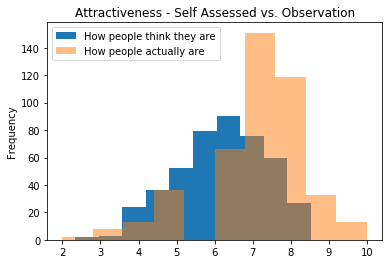

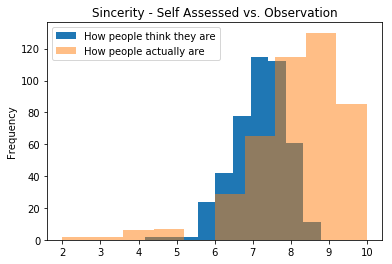

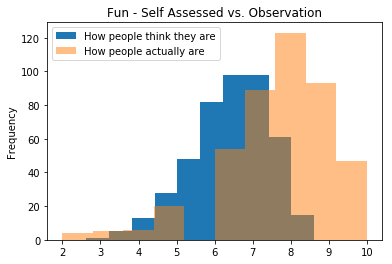

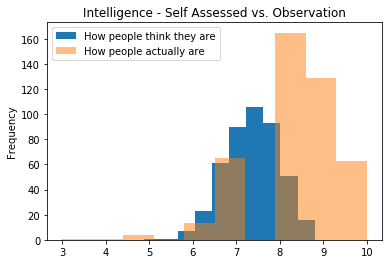

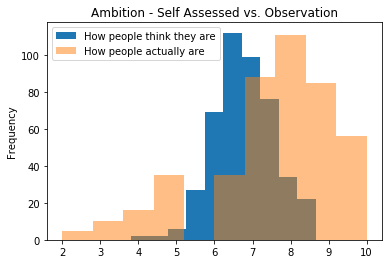

In [26]:
%matplotlib inline
sddSA['attr_o'].plot.hist(alpha=1, bins = 10)
sddSA['attr3_1'].plot.hist(alpha=0.5, bins = 10)
mpl.legend({"How people actually are", "How people think they are"})
mpl.title("Attractiveness - Self Assessed vs. Observation")
mpl.show()
sddSA['sinc_o'].plot.hist(alpha=1, bins = 10)
sddSA['sinc3_1'].plot.hist(alpha=0.5, bins = 10)
mpl.legend({"How people actually are", "How people think they are"})
mpl.title("Sincerity - Self Assessed vs. Observation")
mpl.show()
sddSA['fun_o'].plot.hist(alpha=1, bins = 10)
sddSA['fun3_1'].plot.hist(alpha=0.5, bins = 10)
mpl.legend({"How people actually are", "How people think they are"})
mpl.title("Fun - Self Assessed vs. Observation")
mpl.show()
sddSA['intel_o'].plot.hist(alpha=1, bins = 10)
sddSA['intel3_1'].plot.hist(alpha=0.5, bins = 10)
mpl.legend({"How people actually are", "How people think they are"})
mpl.title("Intelligence - Self Assessed vs. Observation")
mpl.show()
sddSA['amb_o'].plot.hist(alpha=1, bins = 10)
sddSA['amb3_1'].plot.hist(alpha=0.5, bins = 10)
mpl.legend({"How people actually are", "How people think they are"})
mpl.title("Ambition - Self Assessed vs. Observation")
mpl.show()

*In each case, we observe significant overestimations of self-assessed attributes compared to observed attributes, which is logical considering what we saw above.*
- Attractiveness : people (and mostly men) tend to overestimate their attractiveness. It actually follows a distribution close to normal with mean 6, but self-assessment data is much more concentrated, around 7 and 8. People judging themselves as hugely attractive actually do not please everyone, which is why there is no one above 9. Attractiveness seems to really depend on the point of view of the potential partner.
- Sincerity : actual perceived sincerity doesn't seem to have a wide range - most people are between 6 and 8. No one is perceived as very sincere, or not sincere. This suggests that people can't very well judge sincerity in such a short span of time, and that sincerity is not really relevant as an attribute.
- Fun : the actual fun seems to have a very similar distribution as self-assessed fun, but with a lesser range, and a uniform average error of two points. 
- Intelligence : no one regards himself as low intelligence, and people don't judge intelligence harshly - no one is below 5, which is surprising compared to the low values that can be attained for fun. Intelligence is hard to judge in so short of a time, and people are most likely reluctant to judge others as stupid after only 5 minutes of conversation.
- Ambition : no one is perceived by all his potentials partners as having very high ambition or very low ambition, distribution of observed ambition is pretty concentrated around 6.5. This is interesting because ambition is the only attribute for which the self-assessed value is more related to the actual ambition than the perceived value, because it is a personal drive. So people with very low ambition (resp. very high ambition) seem to come across as more (resp. less) ambitious that they are - maybe because they think this makes them more attractive ? Is it conscious or not ?  

*Now let's see if there is any relationship between the values of the self assessed attributes and the errors. Are people more likely to be right about their intelligence, or attractiveness, if they are really intelligent or attractive ?*

In [27]:
#let's change the errors to get square errors, and sum them, to get SSE for each person and each attribute
sddSA = sddOK[['iid', 'gender', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr_o', 'sinc_o', 'fun_o', 'intel_o', 'amb_o']]
sddSA['err_attr'] = (sddSA['attr3_1'] - sddSA['attr_o'])**2
sddSA['err_sinc'] = (sddSA['sinc3_1'] - sddSA['sinc_o'])**2
sddSA['err_fun'] = (sddSA['fun3_1'] - sddSA['fun_o'])**2
sddSA['err_intel'] = (sddSA['intel3_1'] - sddSA['intel_o'])**2
sddSA['err_amb'] = (sddSA['amb3_1'] - sddSA['amb_o'])**2

sddSA = sddSA.groupby('iid').agg({'gender' : 'mean','attr3_1' : 'mean', 'sinc3_1' : 'mean', 'fun3_1' : 'mean', 'intel3_1' : 'mean', 'amb3_1' : 'mean', 'attr_o' : 'mean', 'sinc_o' : 'mean', 'fun_o' : 'mean', 'intel_o' : 'mean', 'amb_o' : 'mean', 'err_attr': 'sum','err_sinc': 'sum', 'err_fun': 'sum', 'err_intel': 'sum', 'err_amb': 'sum'})

#We look at the average SSE, because we don't want our analysis to be biased if some grades are under represented
sddSAErrAttr = sddSA.groupby('attr3_1').agg({'err_attr': 'mean'})
sddSAErrSinc = sddSA.groupby('sinc3_1').agg({'err_sinc': 'mean'})
sddSAErrFun = sddSA.groupby('fun3_1').agg({'err_fun': 'mean'})
sddSAErrIntel = sddSA.groupby('intel3_1').agg({'err_intel': 'mean'})
sddSAErrAmb = sddSA.groupby('amb3_1').agg({'err_amb': 'mean'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

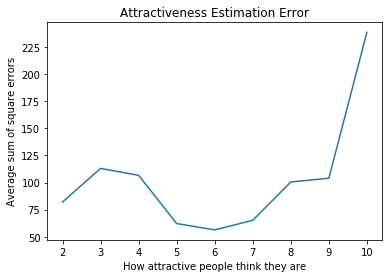

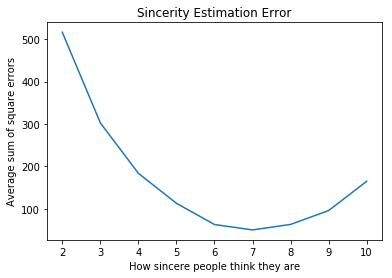

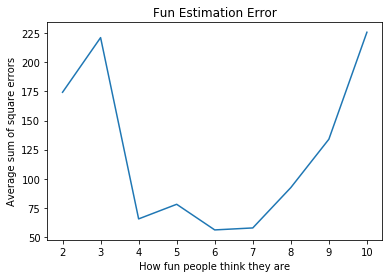

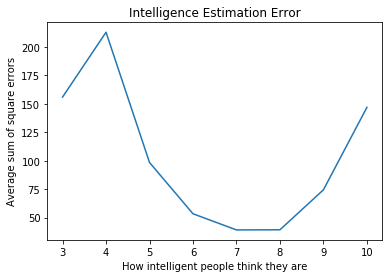

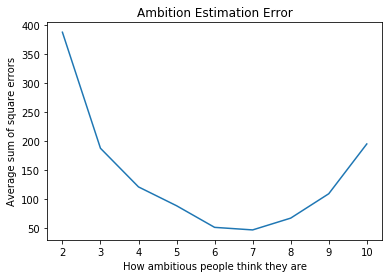

In [28]:
%matplotlib inline

mpl.plot(sddSAErrAttr)
mpl.title("Attractiveness Estimation Error")
mpl.xlabel("How attractive people think they are")
mpl.ylabel("Average sum of square errors")
mpl.show()

mpl.plot(sddSAErrSinc)
mpl.title("Sincerity Estimation Error")
mpl.xlabel("How sincere people think they are")
mpl.ylabel("Average sum of square errors")
mpl.show()

mpl.plot(sddSAErrFun)
mpl.title("Fun Estimation Error")
mpl.xlabel("How fun people think they are")
mpl.ylabel("Average sum of square errors")
mpl.show()

mpl.plot(sddSAErrIntel)
mpl.title("Intelligence Estimation Error")
mpl.xlabel("How intelligent people think they are")
mpl.ylabel("Average sum of square errors")
mpl.show()

mpl.plot(sddSAErrAmb)
mpl.title("Ambition Estimation Error")
mpl.xlabel("How ambitious people think they are")
mpl.ylabel("Average sum of square errors")
mpl.show()

In [29]:
#just checking a few observations to understand if certain plots are biased by outliers
sddSA.query('attr3_1 == 2')

,gender,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr_o,sinc_o,fun_o,intel_o,amb_o,err_attr,err_sinc,err_fun,err_intel,err_amb
iid,,,,,,,,,,,,,,,,
121,0,2.0,9.0,9.0,7.0,9.0,4.8,6.5,4.8,7.2,5.4,108.0,121.0,230.0,44.0,164.0
451,1,2.0,4.0,4.0,4.0,4.0,2.8,7.3,4.8,8.3,8.1,56.0,141.0,46.0,213.0,199.0


In [30]:
sddSA.query('intel3_1 == 3')

,gender,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr_o,sinc_o,fun_o,intel_o,amb_o,err_attr,err_sinc,err_fun,err_intel,err_amb
iid,,,,,,,,,,,,,,,,
240,0,3.0,8.0,5.0,3.0,6.0,6.777778,7.111111,8.0,7.0,7.333333,138.0,14.0,101.0,156.0,52.0


*Other things that we checked don't seem to lead to any problem due to a lack of data. Let's just ignore the points generated by one or two observations, as shown by the queries above, and analyze.*

*Overall, errors are most important for the lowest and highest values. This is not a surprise : given the number of speed dates, the probability of someone constantly receiving the same very low grade or the same very high grade is quite low.*
*Still, it's comforting for people feeling like they fare very poorly at a given attribute : they are most likely wrong*
*On average, it appears that people ranking themselves at 7 for a given attribute (6 for Attractiveness) are the most likely to be right about themselves.*

## Supervised Learning
### Predictive Model for a given individual 

*Now, we want to be able to predict, using a certain individual's self assessment, the probability that any partner of a date will want to see him again. and say 'yes' in our experiment.*

*For this, we get rid of wave 12 since those taking part in this wave were only allowed to say yes to a maximum of 50% of the people they spoke to. This skews the results in comparison to other waves.*

*For each individual, we will need his self assesment and the frequency at which his partner said 'yes'. It now seems clear that our model is one of linear regression, where our regressors are the attributes which we use to predict a value which corresponds to their chance of being accepted by the partner.*

*As we see, of 8,378 rows, only 7,454 have no missing values, which amounts to 89% of values. We will use this data, without missing values, for our predictive model.*

In [31]:
model_data = sdd[['iid','pid','match','gender','attr3_2','sinc3_2','fun3_2','amb3_2','intel3_2','wave']].dropna(axis = 0, how='any')
model_data = model_data[model_data['wave'] != 12] #drop wave 12 where the proportion of 'yes' was limited
model_data = model_data.drop(['wave'],axis=1)

In [32]:
model_data.head()

,iid,pid,match,gender,attr3_2,sinc3_2,fun3_2,amb3_2,intel3_2
0,1,11.0,0,0,6.0,7.0,7.0,6.0,8.0
1,1,12.0,0,0,6.0,7.0,7.0,6.0,8.0
2,1,13.0,1,0,6.0,7.0,7.0,6.0,8.0
3,1,14.0,1,0,6.0,7.0,7.0,6.0,8.0
4,1,15.0,1,0,6.0,7.0,7.0,6.0,8.0


In [33]:
#len(list(set(model_data['iid'].tolist())))
len(list(set(model_data['pid'].tolist())))

523

In [34]:
#We create a table with each subject's self-assessment
individual_grades = model_data.drop(['match','pid'],axis=1).groupby(['iid']).mean()
individual_grades = individual_grades.reset_index()

In [35]:
individual_grades.head()

,iid,gender,attr3_2,sinc3_2,fun3_2,amb3_2,intel3_2
0,1,0,6.0,7.0,7.0,6.0,8.0
1,2,0,7.0,6.0,9.0,4.0,8.0
2,4,0,6.0,8.0,8.0,6.0,7.0
3,5,0,6.0,6.0,9.0,9.0,9.0
4,6,0,5.0,8.0,8.0,3.0,9.0


*Now we have a dataset that gives us, for each individual, his own self-assessment. *

*We now compute the frequency of "yes" that each individual got. For that, we use column "pid" which gives the individual id of each subject's partner, and the average associated match i.e. the frequency of "yes" that this specific person received as a date partner.*

In [36]:
#for each partner, we compute the average match

average_matches = model_data[['pid','match']].astype(int)
average_matches = average_matches.groupby(['pid']).mean()
average_matches = average_matches.reset_index()
average_matches.shape

(523, 2)

In [37]:
average_matches.head()

,pid,match
0,1,0.428571
1,2,0.142857
2,3,0.000000
3,4,0.142857
4,5,0.142857


*We now want to bind dataframes individual_grades and average_matches together so that we have a unique table in which, for each given individual, we have his self-assesment (regressors) and success rate. Thanks to this table we will be able to produce the predictive model we are looking for.*

*On SQL, this would be equivalent to "join on individual_grades.iid = average_matches.pid"*

In [76]:
fit_data = individual_grades.merge(average_matches, how = 'inner', left_on = 'iid', right_on = 'pid')
fit_data = fit_data.drop(['iid','pid'],axis = 1)
fit_data.head()

,gender,attr3_2,sinc3_2,fun3_2,amb3_2,intel3_2,match
0,0,6.0,7.0,7.0,6.0,8.0,0.428571
1,0,7.0,6.0,9.0,4.0,8.0,0.142857
2,0,6.0,8.0,8.0,6.0,7.0,0.142857
3,0,6.0,6.0,9.0,9.0,9.0,0.142857
4,0,5.0,8.0,8.0,3.0,9.0,0.142857


*We now have the data on which we are going to fit our regression model. However we must not forget that we have two different populations in our experiment; men and women and that we make the reasonable assumption, considering what we found using unsupervised learning, that they choose their partner differently. For this, we are going to split the data into two datasets, one for women and one for men*

In [58]:
fit_data_male = fit_data[fit_data['gender'] == 1] #SHOULD BE 1
fit_data_male = fit_data_male.drop('gender', axis = 1)
fit_data_male['match'] = fit_data_male['match']*100

fit_data_female = fit_data[fit_data['gender'] == 0] 
fit_data_female = fit_data_female.drop('gender', axis = 1)
fit_data_female['match'] = fit_data_female['match']*100

*Let us now fit a linear regression model on the dataset for  both genders*

###  Regression model

In [60]:
print(fit_data_male.head())
print(fit_data_female.head())

    attr3_2  sinc3_2  fun3_2  amb3_2  intel3_2      match
7       8.0      8.0     6.0     5.0       8.0   0.000000
8       3.0      7.0     8.0     2.0       7.0  42.857143
9       9.0      9.0     9.0     9.0       9.0  85.714286
10      7.0      7.0     7.0     9.0       9.0  28.571429
11      6.0      7.0     8.0     7.0       8.0  14.285714
   attr3_2  sinc3_2  fun3_2  amb3_2  intel3_2      match
0      6.0      7.0     7.0     6.0       8.0  42.857143
1      7.0      6.0     9.0     4.0       8.0  14.285714
2      6.0      8.0     8.0     6.0       7.0  14.285714
3      6.0      6.0     9.0     9.0       9.0  14.285714
4      5.0      8.0     8.0     3.0       9.0  14.285714


In [72]:
Xm = fit_data_male.drop('match', axis = 1)
ym = fit_data_male['match']
Xf = fit_data_female.drop('match', axis = 1)
yf = fit_data_female['match']

#Let us first split our datasets into training datasets and test datasets.
from sklearn.model_selection import train_test_split
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.10)
Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.10)

In [73]:
#Now we train our linear regression models using the training data

from sklearn.linear_model import LinearRegression
regression_model_m = LinearRegression()
regression_model_m.fit(Xm_train, ym_train)
regression_model_f = LinearRegression()
regression_model_f.fit(Xf_train, yf_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Analysis of results

In [74]:
#Let's now visualize the coefficients of the regressors of our model :
print("For males")
for idx, col_name in enumerate(Xm_train.columns): 
    print("The coefficient for {} is {}".format(col_name, regression_model_m.coef_[idx]))
    
    
print("For females")    
for idx, col_name in enumerate(Xf_train.columns): 
    print("The coefficient for {} is {}".format(col_name, regression_model_f.coef_[idx]))

For males
The coefficient for attr3_2 is -0.17340626447989255
The coefficient for sinc3_2 is -1.418629475222695
The coefficient for fun3_2 is 2.7991074302746917
The coefficient for amb3_2 is 0.05239152339951478
The coefficient for intel3_2 is 0.6921342597152826
For females
The coefficient for attr3_2 is 0.9073796078022863
The coefficient for sinc3_2 is 0.9109461029673823
The coefficient for fun3_2 is 1.320663435972898
The coefficient for amb3_2 is -1.179148733928479
The coefficient for intel3_2 is -0.6635052870291847


*We are not quite satisfied with this regression : because we have aggregated the data at the individual level, we don't have much data. And as a result, the coefficients are quite volatile. To be able to interpret them, let's do the experiment a lot of times, and take the average.*

In [98]:
n = 2000
M = pd.DataFrame(np.empty([n, 6]),
                  columns=['intercept','attr3_2', 'sinc3_2', 'fun3_2', 'amb3_2', 'intel3_2'])
F = pd.DataFrame(np.empty([n, 6]),
                  columns=['intercept','attr3_2', 'sinc3_2', 'fun3_2', 'amb3_2', 'intel3_2'])

for k in range(n) : 
    from sklearn.model_selection import train_test_split
    Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.10)
    Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.10)
    from sklearn.linear_model import LinearRegression
    regression_model_m = LinearRegression()
    regression_model_m.fit(Xm_train, ym_train)
    regression_model_f = LinearRegression()
    regression_model_f.fit(Xf_train, yf_train)
        #for males
    for idx, col_name in enumerate(Xm_train.columns): 
        M.set_value(k, col_name, regression_model_m.coef_[idx])
    M.set_value(k, 'intercept', regression_model_m.intercept_)    
        #for females 
    for idx, col_name in enumerate(Xf_train.columns): 
        F.set_value(k, col_name, regression_model_f.coef_[idx]) 
    F.set_value(k, 'intercept', regression_model_m.intercept_) 
    
print("For men, coefficients are :",  M.mean())       
print("For women, coefficients are :",  F.mean()) 

For men, coefficients are : intercept    5.850232
attr3_2     -0.030966
sinc3_2     -1.288871
fun3_2       2.833247
amb3_2      -0.034153
intel3_2     0.196115
dtype: float64
For women, coefficients are : intercept    5.850232
attr3_2      0.468173
sinc3_2      0.928141
fun3_2       1.275548
amb3_2      -1.160256
intel3_2    -0.366437
dtype: float64


*The takeaway from this is : if you think you're funny, then a speed dating experiment should go well for you !
Sincerity is not attractive to women, and ambition is not attractive to men.*

*Still, what we get is a bit strange. Given the preliminary analysis, we expected attractiveness to be a key covariable, not to have a negative coefficient for men. The linear regression is probably not as relevant as we would like, given the low number of observations we have, and the fact that all covariables are integers.*

*Let's score this model to understand better whether it is actually accurate or not.*

### Scoring the model

*Let us score the accuracy of our model using the $R^2$ statistic, defined as follows : $R^2 = 1 - \frac{RSS}{TSS}$. $TSS$ is the total variability of $y$, and $RSS = ||Y-f(x)||^2$ where $f(x)$ is the prediction of our model.*

*As before, given the variability of the regression, let's repeat it a lot of times and take the mean. *

In [111]:
from sklearn.metrics import mean_squared_error

n = 2000
M = pd.DataFrame(np.empty([n, 2]),
                  columns=['score','mean squared error'])
F = pd.DataFrame(np.empty([n, 2]),
                  columns=['score','mean squared error'])

for k in range(n) : 
    from sklearn.model_selection import train_test_split
    Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size = 0.10)
    Xf_train, Xf_test, yf_train, yf_test = train_test_split(Xf, yf, test_size = 0.10)
    from sklearn.linear_model import LinearRegression
    regression_model_m = LinearRegression()
    regression_model_m.fit(Xm_train, ym_train)
    regression_model_f = LinearRegression()
    regression_model_f.fit(Xf_train, yf_train)
    ym_prediction = regression_model_m.predict(Xm_test)
    yf_prediction = regression_model_f.predict(Xf_test)
        #for males
    M.set_value(k, 'score', regression_model.score(Xm_test,ym_test))   
    M.set_value(k, 'mean squared error', mean_squared_error(ym_prediction,ym_test)) #we include the computation of the MSE too
        #for females 
    F.set_value(k, 'score', regression_model.score(Xf_test,yf_test))   
    F.set_value(k, 'mean squared error', mean_squared_error(yf_prediction,yf_test))  

print("The R^2 statistic for our model for males is",M.mean()[0])
print("The R^2 statistic for our model for females is",F.mean()[0])

The R^2 statistic for our model for males is 0.0264162128383
The R^2 statistic for our model for females is -0.109384668373


*Let us now compute the sum of mean square errors.*

In [112]:
print("The average MSE for our model for males is",M.mean()[1])
print("The average MSE for our model for females is",F.mean()[1])

from math import sqrt
print(sqrt(M.mean()[1]))
print(sqrt(F.mean()[1]))

The average MSE for our model for males is 243.935589342
The average MSE for our model for females is 271.272992637
15.618437480800004
16.47036710693469


*This calculation means that when we predict the probability for an individual to have their partner say "yes", we are off by roughly 16% on average, and we are more often wrong for women.*

*This is not bad, but still, not satisfying, both because of the strange coefficients we had as regressors, and because of the structure of the data (it doesn't make much sense to try to estimate a probability using only integers, and a lot of those values are the same, but result in different match rates.*

*Now, let's change our point of view, and try to see if a logistic regression is more relevant.*

### What is one looking for ?

However, what drives the choice of a person in their choice of a partner, based on how they judge him ? What makes a person decide whether they want to see somene again after spending just 4 minutes with that person ? Let's take a closer look ! 

In [48]:
model_choice = sdd[['iid','match','gender','attr','sinc','fun','amb','intel','shar','wave']].dropna(axis = 0, how='any')
model_choice.head()

,iid,match,gender,attr,sinc,fun,amb,intel,shar,wave
0,1,0,0,6.0,9.0,7.0,6.0,7.0,5.0,1
1,1,0,0,7.0,8.0,8.0,5.0,7.0,6.0,1
2,1,1,0,5.0,8.0,8.0,5.0,9.0,7.0,1
3,1,1,0,7.0,6.0,7.0,6.0,8.0,8.0,1
4,1,1,0,5.0,6.0,7.0,6.0,7.0,6.0,1


In [49]:
model_choice = model_choice[model_choice['wave'] != 12] #Get rid of wave 12
model_choice = model_choice.drop(['wave','iid'],axis=1) #Get rid of column 'wave' since we don't need it anymore

We want to know the importance of each attribute in a woman's choice. So we want a dataset where we have the grades men got from their female counterparts (so the gender = 0, i.e. the grades were given by a female) and whether or not the woman decided to go on with 'yes'

In [50]:
model_choice = model_choice[model_choice['gender'] == 0]
model_choice = model_choice.drop(['gender'],axis=1)
model_choice.head()

,match,attr,sinc,fun,amb,intel,shar
0,0,6.0,9.0,7.0,6.0,7.0,5.0
1,0,7.0,8.0,8.0,5.0,7.0,6.0
2,1,5.0,8.0,8.0,5.0,9.0,7.0
3,1,7.0,6.0,7.0,6.0,8.0,8.0
4,1,5.0,6.0,7.0,6.0,7.0,6.0


We want to fit a logistic regression model on this dataset, in order to predict the result of column 'match' depending on the 6 regressors.

In [51]:
X2 = model_choice.drop('match', axis = 1) 
y2 = model_choice['match']

#Let us first split our dataset into a training dataset and a test dataset.
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.10)

In [52]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression()
logreg_model.fit(X2_train, y2_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [53]:
#Let's now visualize the coefficients of the regressors of our model :

for idx, col_name in enumerate(X2_train.columns): 
    print("The coefficient for {} is {}".format(col_name, logreg_model.coef_[0][idx]))

The coefficient for attr is 0.194815412832317
The coefficient for sinc is -0.020277572015148265
The coefficient for fun is 0.2448191311209297
The coefficient for amb is -0.16367254876936682
The coefficient for intel is 0.0735648009125069
The coefficient for shar is 0.2628760519072888


Let us plot the coefficients of our logistic regression to see them better ! 

In [54]:
my_dict = {}
for idx, col_name in enumerate(X2_train.columns):
    my_dict[col_name] = logreg_model.coef_[0][idx]

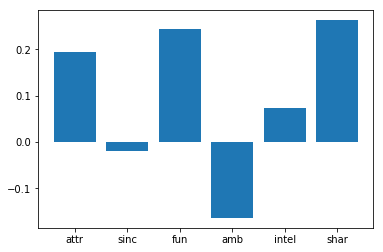

In [55]:
mpl.bar(range(len(my_dict)), list(my_dict.values()), align='center')
mpl.xticks(range(len(my_dict)), list(my_dict.keys()))
mpl.show()

As we can see, what matters most to women (at least, in a speed dating experiment) is whether her partner is funny, attractive and shares interests with her. Being perceived as ambitious, reduces the chances for a man of being liked by her partner.